In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fcn_subset = pd.read_csv('../results/fcn_subset.csv')
deformable_fcn_subset = pd.read_csv('../results/deformable_fcn_subset.csv')

subset_results = pd.concat([fcn_subset, deformable_fcn_subset])
subset_results.shape

(30, 8)

(0.0, 1.2)

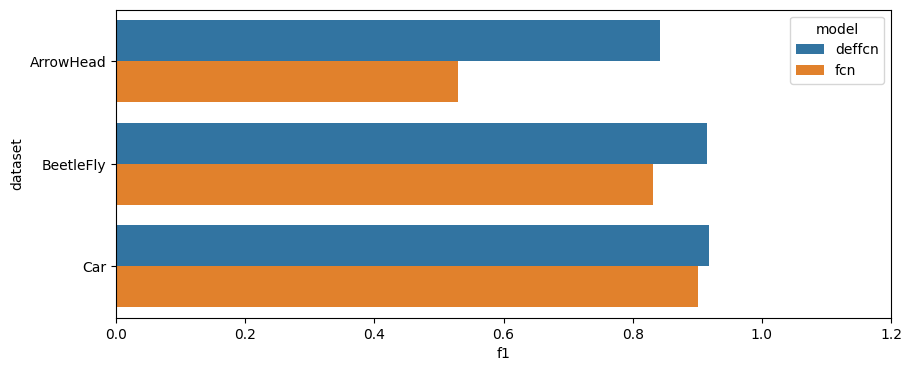

In [27]:
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped_subset_results, x='f1', y='dataset', hue='model')
plt.xlim([0, 1.2])

(0.0, 1.2)

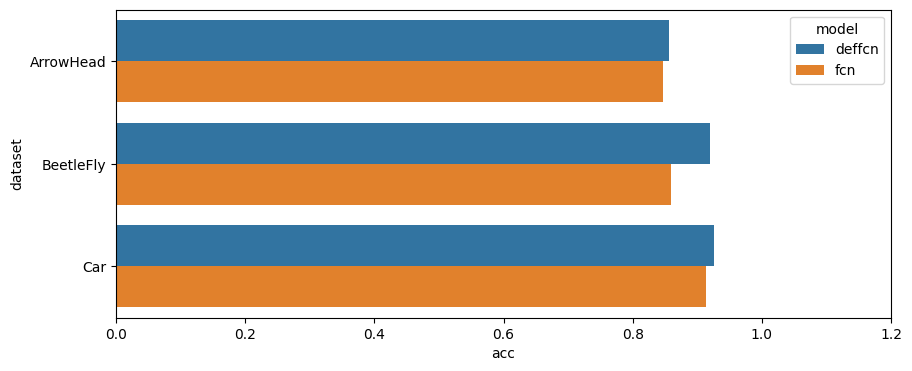

In [28]:
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped_subset_results, x='acc', y='dataset', hue='model')
plt.xlim([0, 1.2])

deffcn ArrowHead
exp            2.000000
acc            0.856000
f1             0.842944
recall         0.866081
precision      0.855813
time         234.196315
Name: (deffcn, ArrowHead), dtype: float64
deffcn BeetleFly
exp            2.000000
acc            0.920000
f1             0.915045
recall         0.914667
precision      0.920947
time         105.369863
Name: (deffcn, BeetleFly), dtype: float64
deffcn Car
exp            2.000000
acc            0.926667
f1             0.917877
recall         0.917444
precision      0.931936
time         303.864023
Name: (deffcn, Car), dtype: float64
fcn ArrowHead
exp           2.000000
acc           0.846857
f1            0.528839
recall        0.506933
precision     0.559356
time         98.015452
Name: (fcn, ArrowHead), dtype: float64
fcn BeetleFly
exp           2.000000
acc           0.860000
f1            0.830857
recall        0.817667
precision     0.861697
time         37.957213
Name: (fcn, BeetleFly), dtype: float64
fcn Car
exp          